<a href="https://colab.research.google.com/github/Dimonage/PractikaAIGubarev/blob/main/GubarevPractica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
db=pd.read_csv('/content/sample_data/dataset.csv',encoding='ISO-8859-1')
db

,Rank,Name,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio
0,NaN,Country/Region,NaN,NaN,NaN,NaN
1,Reporter,Zarqa University,"5,768",18.1,32%,47:53:00
2,NaN,Jordan,NaN,NaN,NaN,NaN
3,Reporter,Ziauddin University,"4,906",8.8,1%,63:37:00
4,NaN,Pakistan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4872,NaN,United Kingdom,NaN,NaN,NaN,NaN
4873,2,Harvard University,"21,887",9.6,25%,50:50:00
4874,NaN,United States,NaN,NaN,NaN,NaN
4875,1,University of Oxford,"20,965",10.6,42%,48:52:00


В датасете присутствуют NaN строки, в одном столбце находятся разные параметры, нужно провести обработку данных

In [ ]:
db.drop(labels=0, inplace=True)
db.reset_index(inplace=True, drop=True)
def find_irregularity(db,full=False):
    prev=-1
    sum=0
    for index, row in db.iterrows():
        if pd.isna(row['Rank']):
            if index-prev!=2:
                sum+=1
                if sum<3 or full==True:
                    print('-------------------------')
                    print(f'Внимание, появилась неоднородность в данных')
                    for i in range(index-2,index+3):
                        print(i,db['Rank'].iloc[i],db['Name'].iloc[i], index-prev)
            prev=index
    print(f"---------------------\nКол-во неодноровностей:{sum}")
    if sum==0:
        print(f"Congrats, all clear!")
find_irregularity(db)

-------------------------
Внимание, появилась неоднородность в данных
38 Reporter Western Caspian University 1
39 nan Azerbaijan 1
40 nan Explore 1
41 Reporter ?Wellspring University 1
42 nan Nigeria 1
-------------------------
Внимание, появилась неоднородность в данных
67 Reporter National University of Uzbekistan named after Mirzo Ulugbek 1
68 nan Uzbekistan 1
69 nan Explore 1
70 Reporter University of Uyo 1
71 nan Nigeria 1
---------------------
Кол-во неодноровностей:186


Имеется неоднородность в данных. В одном столбце находятся и названия университетов, и их страны. Уберем лишние строки Explore

In [ ]:
db=db[db['Name']!='Explore']
db.reset_index(inplace=True, drop=True)
find_irregularity(db, full=True)

-------------------------
Внимание, появилась неоднородность в данных
2346 10011200 St Marianna University School of Medicine 1
2347 nan Japan 1
2348 nan Not accredited 1
2349 10011200 ?tefan cel Mare University of Suceava 1
2350 nan Romania 1
---------------------
Кол-во неодноровностей:1


Осталась только одна неоднородность

In [ ]:
db.iloc[2345:2351]

,Rank,Name,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio
2345,NaN,United Kingdom,NaN,NaN,NaN,NaN
2346,10011200,St Marianna University School of Medicine,833,0.9,1%,39 : 61
2347,NaN,Japan,NaN,NaN,NaN,NaN
2348,NaN,Not accredited,NaN,NaN,NaN,NaN
2349,10011200,?tefan cel Mare University of Suceava,"9,239",24.8,14%,59:41:00
2350,NaN,Romania,NaN,NaN,NaN,NaN


Разобравшись с причиной такой неоднородности, я пришел к выводу что скорее всего данный университет не аккредитован. Поэтому просто избавлюсь от всех похожих строк.

In [ ]:
db=db[db['Name']!='Not accredited']
db.reset_index(inplace=True, drop=True)
find_irregularity(db, full=True)

---------------------
Кол-во неодноровностей:0
Congrats, all clear!


In [ ]:
countries=[]
indexes=[]
for index, row in db.iterrows():
    if index%2==1:
        countries.append(row['Name'])
        indexes.append(index)
db.drop(labels=indexes, inplace=True)
db.reset_index(inplace=True, drop=True)

In [ ]:
db.insert(2,'Country',countries)
db

,Rank,Name,Country,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio
0,Reporter,Zarqa University,Jordan,"5,768",18.1,32%,47:53:00
1,Reporter,Ziauddin University,Pakistan,"4,906",8.8,1%,63:37:00
2,Reporter,Zhytomyr Polytechnic State University,Ukraine,"3,869",15.4,1%,34 : 66
3,Reporter,"Yusuf Maitama Sule University, Kano",Nigeria,"12,880",33.0,0%,48:52:00
4,Reporter,York St John University,United Kingdom,"6,315",18.6,12%,65:35:00
...,...,...,...,...,...,...,...
2340,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60
2341,3,Stanford University,United States,"16,164",7.1,24%,46:54:00
2342,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47:53:00
2343,2,Harvard University,United States,"21,887",9.6,25%,50:50:00


Некоторые значения в тексте выглядят странно, а именно в столбце No fo FTE Students, что значит количество студентов обучающихся в классическом режиме (Очно/Заочно), написаны с запятой а не с точкой, именно поэтому числа не воспринимаются впринципе как числа.

In [ ]:
db.dtypes

,0
Rank,object
Name,object
Country,object
No. of FTE Students,object
No. of students per staff,float64
International Students,object
Female:Male Ratio,object


In [ ]:
db["No. of FTE Students"]=db["No. of FTE Students"].str.replace(',','.')
db["No. of FTE Students"]= db["No. of FTE Students"].astype(float)
print(db['No. of FTE Students'])

0        5.768
1        4.906
2        3.869
3       12.880
4        6.315
         ...  
2340    11.415
2341    16.164
2342    20.185
2343    21.887
2344    20.965
Name: No. of FTE Students, Length: 2345, dtype: float64


In [ ]:
db[db["International Students"]=='']

,Rank,Name,Country,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio


In [ ]:
db.drop(labels=[371,483,1471],inplace=True)
db.reset_index(inplace=True, drop=True)

In [ ]:
db["International Students"]=db["International Students"].str.replace('%','')
db["International Students"]= db["International Students"].astype(float)
db["International Students"]= db["International Students"].apply(lambda x : x/100)
print(db['International Students'])

0       0.32
1       0.01
2       0.01
3       0.00
4       0.12
        ... 
2337    0.33
2338    0.24
2339    0.39
2340    0.25
2341    0.42
Name: International Students, Length: 2342, dtype: float64


In [ ]:
db

,Rank,Name,Country,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio
0,Reporter,Zarqa University,Jordan,5.768,18.1,0.32,47:53:00
1,Reporter,Ziauddin University,Pakistan,4.906,8.8,0.01,63:37:00
2,Reporter,Zhytomyr Polytechnic State University,Ukraine,3.869,15.4,0.01,34 : 66
3,Reporter,"Yusuf Maitama Sule University, Kano",Nigeria,12.880,33.0,0.00,48:52:00
4,Reporter,York St John University,United Kingdom,6.315,18.6,0.12,65:35:00
...,...,...,...,...,...,...,...
2337,5,Massachusetts Institute of Technology,United States,11.415,8.2,0.33,40 : 60
2338,3,Stanford University,United States,16.164,7.1,0.24,46:54:00
2339,3,University of Cambridge,United Kingdom,20.185,11.3,0.39,47:53:00
2340,2,Harvard University,United States,21.887,9.6,0.25,50:50:00


In [ ]:
null_index=list(db[db['Female:Male Ratio'].isnull()].index)

for index, row in db.iterrows():
    ratio=db['Female:Male Ratio'][index]
    if index not in (null_index):
        ratio=ratio.replace(' ','')
        ratio=ratio.split(':')
        if len(ratio)==3:
            ratio.pop(-1)
        if len(ratio)==2:
            a=int(ratio[0])
            b=int(ratio[1])
            if b!=0:
                ratio[0]=float(a/b)
            else:
                ratio[0]=100.
            ratio.pop(-1)
        ratio=float(ratio[0])
        db.loc[index,'Female:Male Ratio']=ratio
        # print(ratio)
db['Female:Male Ratio'] = db['Female:Male Ratio'].fillna(db['Female:Male Ratio'].mean())

<ipython-input-19-90e012c3e4d6>:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  db['Female:Male Ratio'] = db['Female:Male Ratio'].fillna(db['Female:Male Ratio'].mean())


In [ ]:
print(set(db['Rank']))

{'122', '16', '39', '15', '170', '155', '107', '17', '174', '112', '110', '79', '6', '137', '69', '21', '35', '50', '151', '29', '23', '85', '117', '41', '168', '1', '194', '106', '1501+', '154', '25', '38', '59', '42', '58', '80', '22', '86', '61', '601\x96800', '166', '114', '99', '123', '301\x96350', '94', '148', '33', '73', '139', '51', '196', '101', '71', '63', '68', '351\x96400', '186', '198', '91', '88', '126', '161', '104', '10', '801\x961000', '7', '179', '76', '19', '111', '75', '95', '201\x96250', '46', '251\x96300', '8', '1201\x961500', '121', '43', '113', '77', '180', '146', '192', '135', '70', '67', '24', '147', '5', '124', '26', '45', '36', '401\x96500', '128', '118', '136', '131', '66', '127', '52', '501\x96600', '1001\x961200', '20', '78', '65', '183', '119', '60', '189', '98', '176', '90', 'Reporter', '144', '49', '2', '181', '160', '74', '18', '28', '89', '32', '163', '37', '11', '173', '93', '34', '145', '9', '40', '182', '82', '191', '156', '62', '54', '53', '48', 

In [ ]:
size=len(db.index)

index_report=list(db[db['Rank']=='Reporter'].index) # That will help us soon.

for i in range(size):
    db.loc[i,'Rank']=size-i

db['Rank']=db['Rank'].astype(int)
print(db['Rank'])

0       2342
1       2341
2       2340
3       2339
4       2338
        ... 
2337       5
2338       4
2339       3
2340       2
2341       1
Name: Rank, Length: 2342, dtype: int64


In [ ]:
print(db.dtypes)

Rank                           int64
Name                          object
Country                       object
No. of FTE Students          float64
No. of students per staff    float64
International Students       float64
Female:Male Ratio            float64
dtype: object


In [ ]:
print(db.isnull().any())

Rank                         False
Name                         False
Country                      False
No. of FTE Students          False
No. of students per staff    False
International Students       False
Female:Male Ratio            False
dtype: bool


<Axes: >

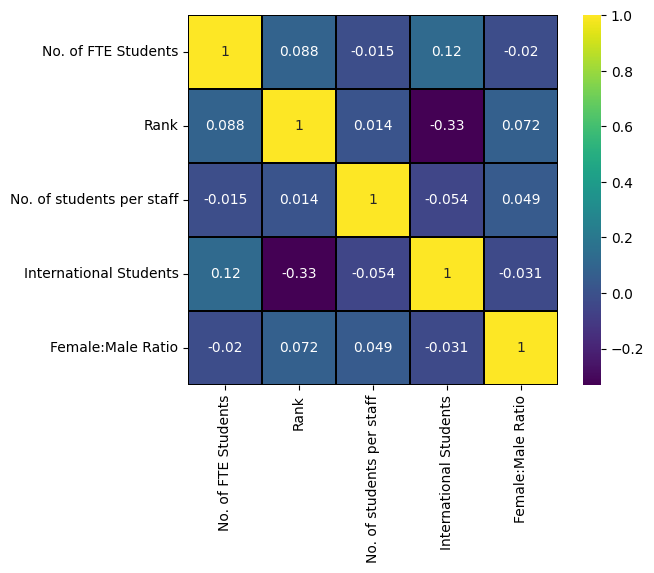

In [ ]:
sns.heatmap(db[['No. of FTE Students','Rank','No. of students per staff','International Students','Female:Male Ratio']].corr(),linewidths=0.25,vmax=1.0, square=True, cmap="viridis", linecolor='k', annot=True)

Text(0.5, 1.0, 'Зависимость места в рейтинге от доли иностранных студентов')

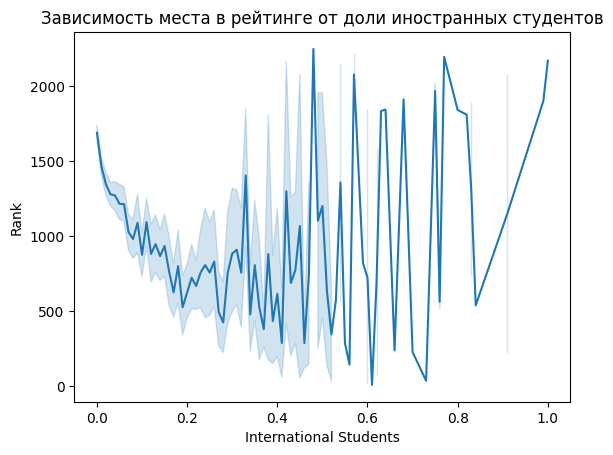

In [ ]:
plot=sns.lineplot(x="International Students", y="Rank",data=db)
plot.set_title('Зависимость места в рейтинге от доли иностранных студентов')

In [ ]:
print(index_report)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

Text(0.5, 1.0, 'Зависимость места в рейтинге от доли иностранных студентов')

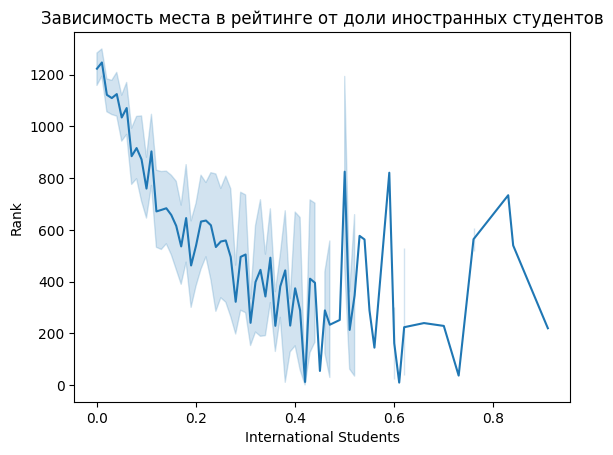

In [ ]:
plot=sns.lineplot(x="International Students", y="Rank",data=db[db['Rank']<1800])
plot.set_title('Зависимость места в рейтинге от доли иностранных студентов')

In [ ]:
db.head()

,Rank,Name,Country,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio
0,2342,Zarqa University,Jordan,5.768,18.1,0.32,0.886792
1,2341,Ziauddin University,Pakistan,4.906,8.8,0.01,1.702703
2,2340,Zhytomyr Polytechnic State University,Ukraine,3.869,15.4,0.01,0.515152
3,2339,"Yusuf Maitama Sule University, Kano",Nigeria,12.880,33.0,0.00,0.923077
4,2338,York St John University,United Kingdom,6.315,18.6,0.12,1.857143


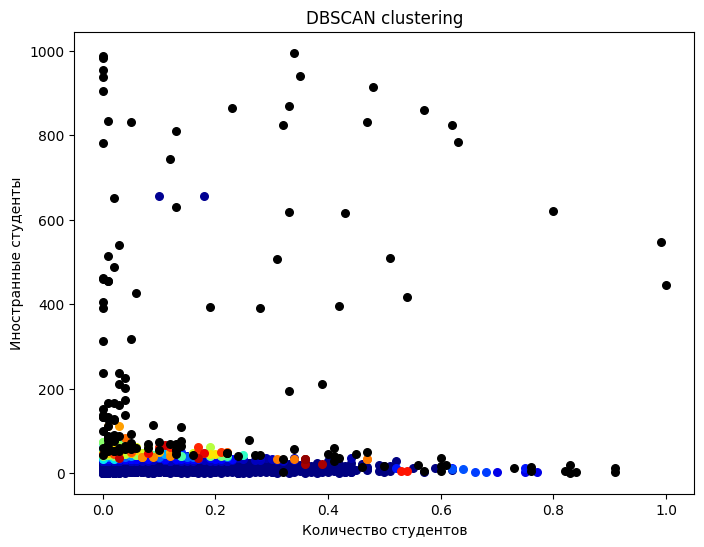

In [ ]:
X = db[['International Students', 'No. of FTE Students']].values

dbscan = DBSCAN(eps=0.2, min_samples=2)
labels = dbscan.fit_predict(X)


plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:

        col = 'k'

    class_member_mask = (labels == k)


    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=30, color=col, label=f'Cluster {k}')

plt.title('DBSCAN clustering')
plt.xlabel('Количество студентов')
plt.ylabel('Иностранные студенты')
plt.show()

Mean Squared Error с использованием кросс-валидации: 0.017637309378282413


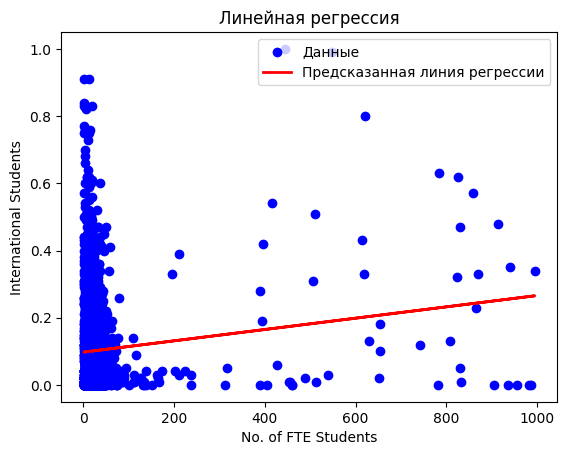

Коэффициент: 0.0001684897836027053
Свободный член: 0.09752987446393716


In [ ]:
X = db[['No. of FTE Students']].values
y = db['International Students'].values


model = LinearRegression()


scores = cross_val_score(model, X, y, cv=20, scoring='neg_mean_squared_error')


mean_mse = np.mean(-scores)
print(f'Mean Squared Error с использованием кросс-валидации: {mean_mse}')


model.fit(X, y)


y_pred = model.predict(X)


plt.scatter(X, y, color='blue', label='Данные')
plt.plot(X, y_pred, color='red', linewidth=2, label='Предсказанная линия регрессии')
plt.title('Линейная регрессия')
plt.xlabel('No. of FTE Students')
plt.ylabel('International Students')
plt.legend()
plt.show()


print(f'Коэффициент: {model.coef_[0]}')
print(f'Свободный член: {model.intercept_}')

Итерация 1: Mean Squared Error = 0.028355045752545487
Итерация 2: Mean Squared Error = 0.026115606005259116
Итерация 3: Mean Squared Error = 0.02745999682279004
Итерация 4: Mean Squared Error = 0.026993244849005133
Итерация 5: Mean Squared Error = 0.026661271109834673
Итерация 6: Mean Squared Error = 0.027734210652858856
Итерация 7: Mean Squared Error = 0.027821141683481456
Итерация 8: Mean Squared Error = 0.027530565101907278
Итерация 9: Mean Squared Error = 0.027214132410317712
Итерация 10: Mean Squared Error = 0.026516157116843554
Итерация 11: Mean Squared Error = 0.02704719764360644
Итерация 12: Mean Squared Error = 0.027541440099443593
Итерация 13: Mean Squared Error = 0.027256260476743784
Итерация 14: Mean Squared Error = 0.027634447897609524
Итерация 15: Mean Squared Error = 0.02696381011331858
Итерация 16: Mean Squared Error = 0.027366507160582615
Итерация 17: Mean Squared Error = 0.026608007266619514
Итерация 18: Mean Squared Error = 0.027864264259430588
Итерация 19: Mean Squa

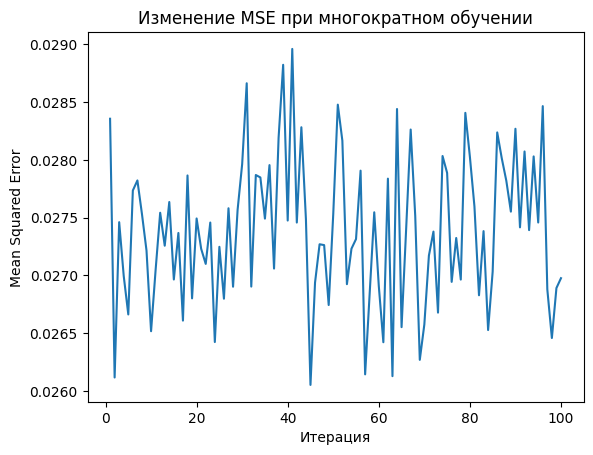

In [ ]:
num_iterations = 100
scores = []


model = LinearRegression()


original_X = X.copy()
original_y = y.copy()

for i in range(num_iterations):

    noise_X = np.random.normal(0, 0.1, original_X.shape)
    noise_y = np.random.normal(0, 0.1, original_y.shape)


    noisy_X = original_X + noise_X
    noisy_y = original_y + noise_y


    mse_score = -cross_val_score(model, noisy_X, noisy_y, cv=100, scoring='neg_mean_squared_error').mean()
    scores.append(mse_score)
    print(f'Итерация {i + 1}: Mean Squared Error = {mse_score}')


plt.plot(range(1, num_iterations + 1), scores)
plt.xlabel('Итерация')
plt.ylabel('Mean Squared Error')
plt.title('Изменение MSE при многократном обучении')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))

print(f'Random Forest RMSE: {rf_rmse}')
print(f'Gradient Boosting RMSE: {gb_rmse}')

Random Forest RMSE: 0.15455733571405475
Gradient Boosting RMSE: 0.12865368608606187


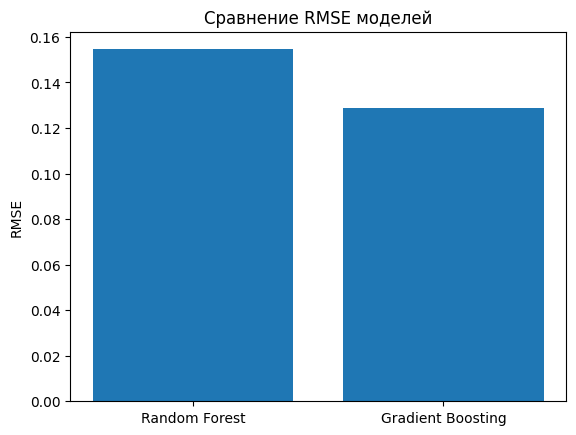

In [ ]:
models = ['Random Forest', 'Gradient Boosting']
rmse_values = [rf_rmse, gb_rmse]

plt.bar(models, rmse_values)
plt.ylabel('RMSE')
plt.title('Сравнение RMSE моделей')
plt.show()

In [ ]:
rf_model.n_estimators += 50

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, warm_start=True)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(warm_start=True)

In [ ]:
gb_model.n_estimators += 50
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=150, warm_start=True)

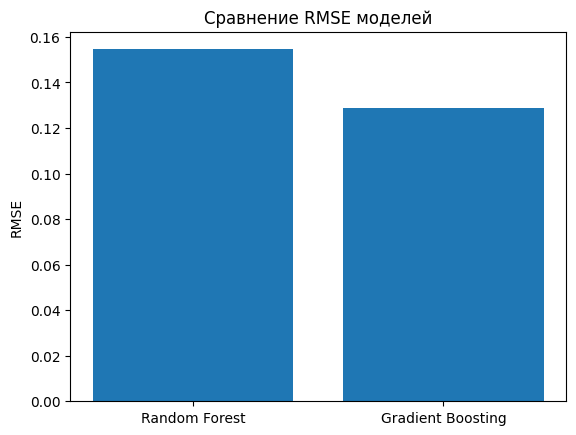

In [ ]:
models = ['Random Forest', 'Gradient Boosting']
rmse_values = [rf_rmse, gb_rmse]

plt.bar(models, rmse_values)
plt.ylabel('RMSE')
plt.title('Сравнение RMSE моделей')
plt.show()

In [ ]:
num_iterations = 10
scores = []

model = rf_model

original_X = X.copy()
original_y = y.copy()

for i in range(num_iterations):
    mse_score = -cross_val_score(model, original_X, original_y, cv=100, scoring='neg_mean_squared_error').mean()
    scores.append(mse_score)
    print(f'Итерация {i + 1}: Mean Squared Error = {mse_score}')

plt.plot(range(1, num_iterations + 1), scores)
plt.xlabel('Итерация')
plt.ylabel('Mean Squared Error')
plt.title('Изменение MSE при многократном обучении')
plt.show()

KeyboardInterrupt: 

Mean Squared Error (MSE): 0.0239
R-squared (R2): -0.4622


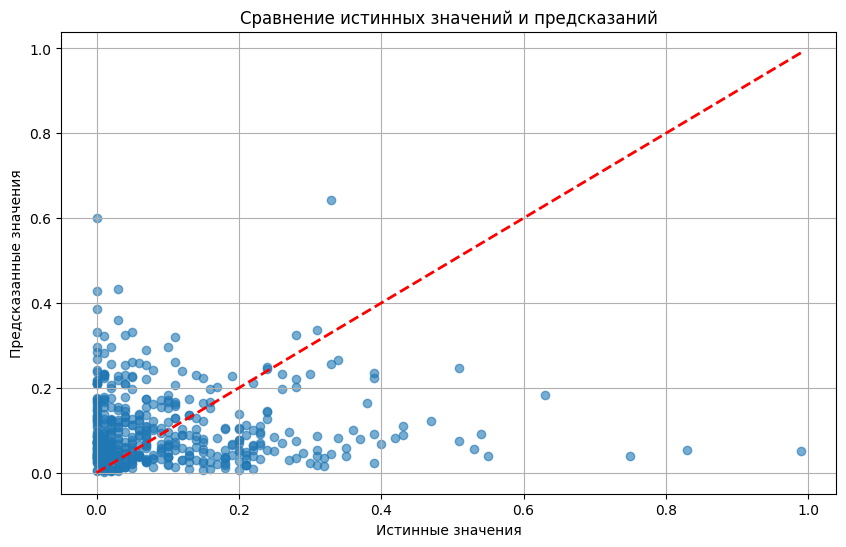

In [ ]:
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Сравнение истинных значений и предсказаний')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
db

,Rank,Name,Country,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio
0,2342,Zarqa University,Jordan,5.768,18.1,0.32,0.886792
1,2341,Ziauddin University,Pakistan,4.906,8.8,0.01,1.702703
2,2340,Zhytomyr Polytechnic State University,Ukraine,3.869,15.4,0.01,0.515152
3,2339,"Yusuf Maitama Sule University, Kano",Nigeria,12.880,33.0,0.00,0.923077
4,2338,York St John University,United Kingdom,6.315,18.6,0.12,1.857143
...,...,...,...,...,...,...,...
2337,5,Massachusetts Institute of Technology,United States,11.415,8.2,0.33,0.666667
2338,4,Stanford University,United States,16.164,7.1,0.24,0.851852
2339,3,University of Cambridge,United Kingdom,20.185,11.3,0.39,0.886792
2340,2,Harvard University,United States,21.887,9.6,0.25,1.000000


In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
X = db[['No. of FTE Students']].values
y = db['International Students'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
training_data = list(zip(X_train, y_train))

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 212.1721 - mae: 3.5956 - val_loss: 0.0239 - val_mae: 0.0950
Epoch 2/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0389 - mae: 0.1011 - val_loss: 0.0218 - val_mae: 0.1189
Epoch 3/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0180 - mae: 0.0981 - val_loss: 0.0203 - val_mae: 0.0934
Epoch 4/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1250 - mae: 0.1181 - val_loss: 0.0198 - val_mae: 0.1017
Epoch 5/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 - mae: 0.0921 - val_loss: 0.0197 - val_mae: 0.0987
Epoch 6/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 - mae: 0.0929 - val_loss: 0.0199 - val_mae: 0.1048
Epoch 7/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0180 - mae: 0.0947 - val_loss: 0.0197 - val_mae: 0.1010
Epoch 8/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0159 - mae: 0.0907 - val_loss: 0.0197 - val_mae: 0.0992
Epoch 9/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0155 - mae: 0

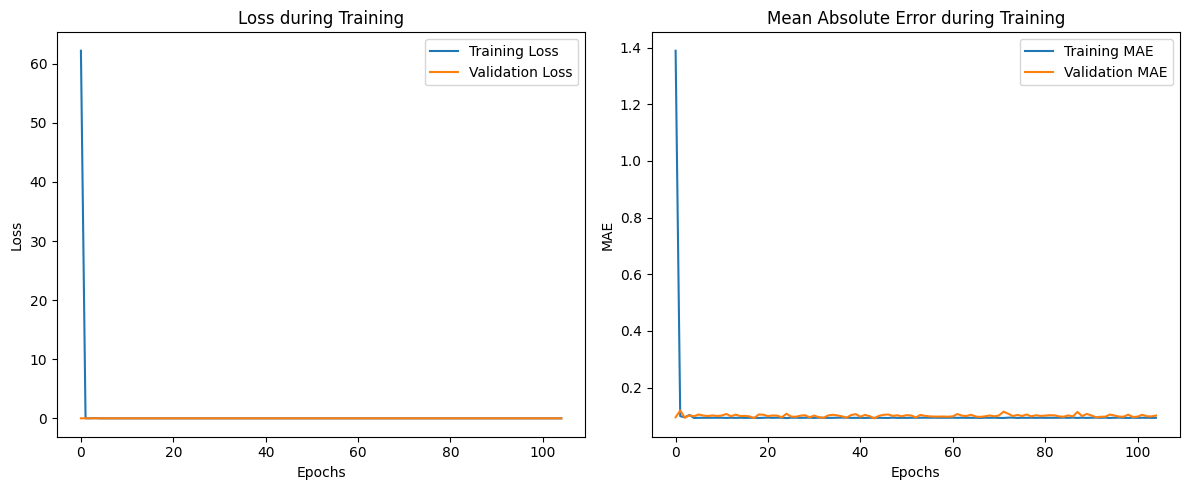

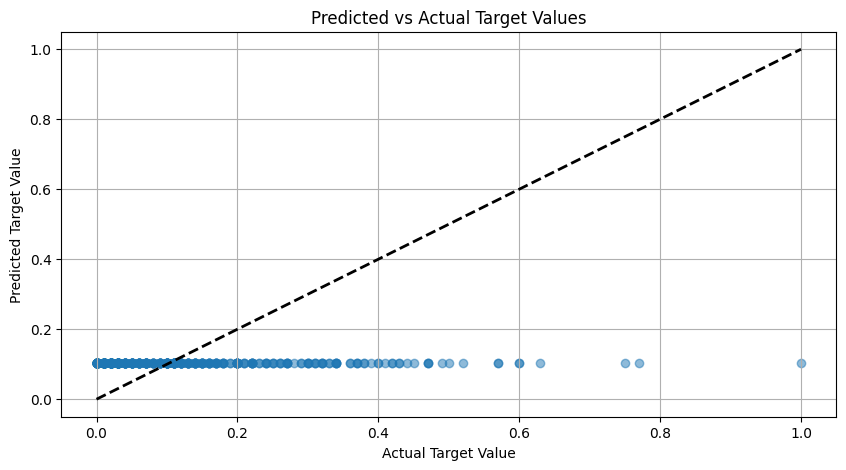

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

def create_model(input_shape):
    model = Sequential()
    model.add(Dense(256, input_dim=input_shape, activation='relu'))  # Увеличили размер первого слоя
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))  # Добавили еще один скрытый слой
    model.add(Dense(1))

    return model

def train_and_visualize(model, X_train, y_train, X_test, y_test, epochs=500, batch_size=20, validation_split=0.2):
  optimizer = RMSprop(0.010)  # Попробуйте различные значения lr от 0.0001 до 0.01
  model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

  early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

  history = model.fit(
        X_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=validation_split,
        callbacks=[early_stopping],  # Добавили раннюю остановку
        verbose=1
    )

  y_pred = model.predict(X_test)

  def plot_training_history():
        plt.figure(figsize=(12, 5))

        plt.subplot(121)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss during Training')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(122)
        plt.plot(history.history['mae'], label='Training MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title('Mean Absolute Error during Training')
        plt.xlabel('Epochs')
        plt.ylabel('MAE')
        plt.legend()

        plt.tight_layout()
        plt.show()

  def plot_predictions_vs_actual():
        plt.figure(figsize=(10, 5))
        plt.scatter(y_test, y_pred.flatten(), alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], c='k', ls='--', lw=2)
        plt.title('Predicted vs Actual Target Values')
        plt.xlabel('Actual Target Value')
        plt.ylabel('Predicted Target Value')
        plt.grid(True)
        plt.show()

  plot_training_history()
  plot_predictions_vs_actual()

# Создание и обучение модели
model = create_model(X_train.shape[1])
train_and_visualize(model, X_train, y_train, X_test, y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


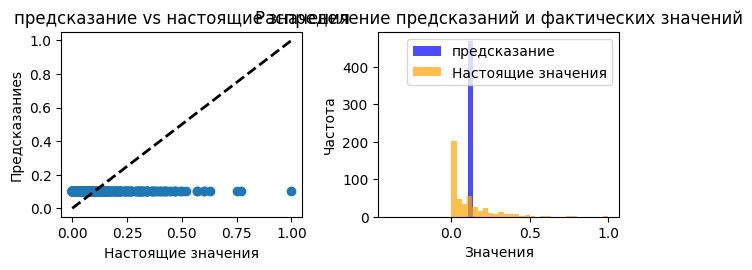

In [ ]:
predictions = model.predict(X_test)
plt.subplot(2, 2, 3)
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('предсказание vs настоящие значения')
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказаниеs')


plt.subplot(2, 2, 4)
plt.hist(predictions, bins=30, alpha=0.7, label='предсказание', color='blue')
plt.hist(y_test, bins=30, alpha=0.7, label='Настоящие значения', color='orange')
plt.title('Распределение предсказаний и фактических значений')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'features' is not defined

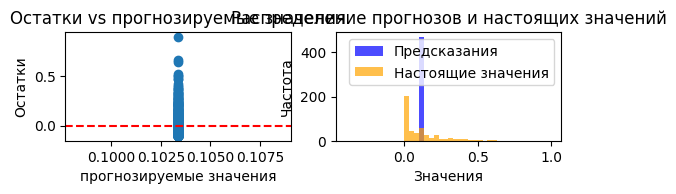

In [ ]:
residuals = y_test - predictions.flatten()
plt.subplot(3, 2, 3)
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Остатки vs прогнозируемые значения')
plt.xlabel('прогнозируемые значения')
plt.ylabel('Остатки')


plt.subplot(3, 2, 4)
plt.hist(predictions, bins=30, alpha=0.7, label='Предсказания', color='blue')
plt.hist(y_test, bins=30, alpha=0.7, label='Настоящие значения', color='orange')
plt.title('Распределение прогнозов и настоящих значений')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()


importance = np.abs(model.layers[0].get_weights()[0]).sum(axis=1)
feature_importance = pd.Series(importance, index=features.columns).sort_values(ascending=False)

plt.subplot(3, 2, 5)
feature_importance.plot(kind='bar')
plt.title('Важность функции')
plt.ylabel('Оценка важности')


plt.subplot(3, 2, 6)
plt.plot(history.history['loss'], label='Train потери')
plt.plot(history.history['val_loss'], label='Validation потери')
plt.title('Потери в течение эпох с EarlyStopping')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
db

NameError: name 'db' is not defined